Data Scientist and Data Analyst jobs require a specialized set of skills. I want to identify the most in demand skills in the Glassdoor job descriptions for a Data Scientist and Data Analyst, so I know which ones  to focus on developing first to be a more highly rated candidate during my job search. Understanding where these jobs are located and in which industries will allow me to more efficiently focus my search in the appropriate state and industry to increase my odds of getting a job as a Data Scientist or Data Analyst.

In [1]:
# Import Pandas and Numpy.
# Load data from .CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from collections import Counter
import re
df = pd.read_csv('/Users/johnharmer/Library/CloudStorage/GoogleDrive-jwharmeriv@gmail.com/My Drive/Springboard - Data Science/Capstone Projects/Capstone 2/glassdoor_jobs.csv')

In [2]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,-1,Job Overview\nA Data Scientist at ExploreLearn...,4.2,Cambium Learning Group\n4.3,Remote,1001 to 5000 Employees,2004,Company - Private,Primary & Secondary Schools,Education,$500 million to $1 billion (USD)
1,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD)
2,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD)
3,Data Scientist 2,Employer Provided Salary:$94K - $183K,The Microsoft 365 team is looking for a Data S...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD)
4,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"You may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000,Company - Private,Chemical Manufacturing,Manufacturing,$10+ billion (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Global Technology Transformation Analytics Vic...,Employer Provided Salary:$128K - $190K,JOB DESCRIPTION\n\nThe Global Technology Trans...,4.0,JPMorgan Chase & Co\n4.0,"New York, NY",10000+ Employees,1799,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD)
1496,Senior Data Scientist,Employer Provided Salary:$145K,Job Summary:\nWe are seeking a talented and ex...,4.3,Cydcor\n4.3,"Agoura Hills, CA",51 to 200 Employees,1994,Company - Private,Advertising & Public Relations,Media & Communication,$5 to $25 million (USD)
1497,Remote - Data Scientist,Employer Provided Salary:$79K - $120K,"We’re looking for talented professionals, anyw...",3.0,Green Dot Corporation\n3.1,Remote,1001 to 5000 Employees,1999,Company - Public,Financial Transaction Processing,Financial Services,$1 to $5 billion (USD)
1498,Market Data Analyst,$53K - $77K (Glassdoor est.),Summary:\n**PLEASE NOTE - This is NOT a techni...,-1.0,S4 Market Data,"Trenton, NJ",Unknown,-1,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable


<h1 style="color: blue;"><b>DATA CLEANING</b></h1>

In [3]:
print(df.loc[0:1]['Job Description'])

0    Job Overview\nA Data Scientist at ExploreLearn...
1    Our Company\n\nChanging the world through digi...
Name: Job Description, dtype: object


In [4]:
# Extract skills by using a regex pattern to identify skills and technologies in the 'Job Description'.
pattern = re.compile(
    r"(Python|pandas|Scikit-learn|dplyr|ggplot2|SQL|Data visualization|Tableau|PowerBI|GitHub|Machine learning|"
    r"Statistics|Hypothesis Testing|A/B Testing|Data analysis|AI|Business insights|Analysis|Analytics|SQL|Modeling|"
    r"Java|Scala|Excel|Tableau|PowerBI|SAS|SPSS|D3\.js|Matplotlib|Seaborn|Bokeh"
    r"TensorFlow|PyTorch|Keras|NLTK|SpaCy|Gensim|Pandas|NumPy|SciPy|"
    r"Hadoop|Spark|Pig|Hive|Shiny|Matlab|Octave|VBA|Stata|"
    r"Machine Learning|Deep Learning|NLP|Computer Vision|Big Data|Data Mining|"
    r"Data Cleaning|Predictive Modeling|Probability|Statistical analysis|"
    r"Linear Algebra|Calculus|Optimization|Causal Inference|"
    r"Cloud Computing|AWS|Azure|GCP|GitHub|Git|SVN|"
    r"REST APIs|Microservices|Docker|Kubernetes"
    r")\b",
    re.IGNORECASE)

# Create a column to house the extracted skills for further analysis.
df['Extracted Skills'] = df['Job Description'].str.extractall(pattern).unstack().apply(lambda x: ', '.join(x.dropna()), axis=1)
df.head(20)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Extracted Skills
0,Data Scientist,-1,Job Overview\nA Data Scientist at ExploreLearn...,4.2,Cambium Learning Group\n4.3,Remote,1001 to 5000 Employees,2004,Company - Private,Primary & Secondary Schools,Education,$500 million to $1 billion (USD),"analysis, AI, analytics, machine learning, AI"
1,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD),"Analytics, machine learning, analytics, Python..."
2,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD),"AI, AI, machine learning"
3,Data Scientist 2,Employer Provided Salary:$94K - $183K,The Microsoft 365 team is looking for a Data S...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD),"optimization, Machine Learning, Optimization, aws"
4,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"You may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000,Company - Private,Chemical Manufacturing,Manufacturing,$10+ billion (USD),NaN
5,Data Scientist (C),Employer Provided Salary:$65.00 - $75.00 Per Hour,The Team:\nAt Client’s Artificial Intelligence...,-1.0,IVID TEK INC,Remote,1 to 50 Employees,-1,Company - Public,-1,-1,Unknown / Non-Applicable,"AI, AI, AI, AI, AI, AI, AI, NLP, machine learn..."
6,Senior Data Scientist,Employer Provided Salary:$141K - $254K,POSITION: Senior Data Scientist\n\nJOB Locatio...,3.6,AT&T\n3.6,"Dallas, TX",10000+ Employees,1876,Company - Public,Telecommunications Services,Telecommunications,$10+ billion (USD),"modeling, data mining"
7,Data Scientist,Employer Provided Salary:$85K,Details\nDepartment: Workforce Planning and An...,3.4,Ascension\n3.4,Remote,10000+ Employees,1902,Nonprofit Organization,Health Care Services & Hospitals,Healthcare,Unknown / Non-Applicable,Analytics
8,Data Scientist,$102K - $138K (Glassdoor est.),Company Description\n\nVisa is a world leader ...,4.1,Visa\n4.1,"Washington, DC",10000+ Employees,1958,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD),NaN
9,Data Scientist- CalAIM,Employer Provided Salary:$51.00 - $68.72 Per Hour,Salary: $51.00 - $68.72 Per Hour\nCommunity Pr...,3.3,Heluna Health\n3.3,"Los Angeles, CA",1001 to 5000 Employees,1968,Nonprofit Organization,Civic & Social Services,Nonprofit & NGO,$25 to $100 million (USD),NaN


In [5]:
# Split the 'Extracted Skills' column to get a list of skills for each row.
df['Skills List'] = df['Extracted Skills'].str.lower().str.split(', ')

In [6]:
# Make a single list of skills and drop null values.
all_skills = [skill.strip() for sublist in df['Skills List'].dropna() for skill in sublist]

In [7]:
# Count the occurrences of each skill.
skills_series = pd.Series(all_skills)
skills_counts = skills_series.value_counts()
print(skills_counts)

analytics               591
machine learning        538
analysis                401
ai                      355
modeling                225
python                  193
statistics              180
statistical analysis    149
aws                     141
sql                     112
data visualization      105
sas                     101
data analysis            98
tableau                  97
data mining              75
optimization             67
computer vision          57
nlp                      50
big data                 48
deep learning            42
excel                    33
pandas                   31
hypothesis testing       30
spark                    25
git                      24
numpy                    23
calculus                 19
predictive modeling      18
azure                    15
business insights        13
pytorch                  12
hadoop                   12
causal inference         10
github                    9
hive                      9
powerbi             

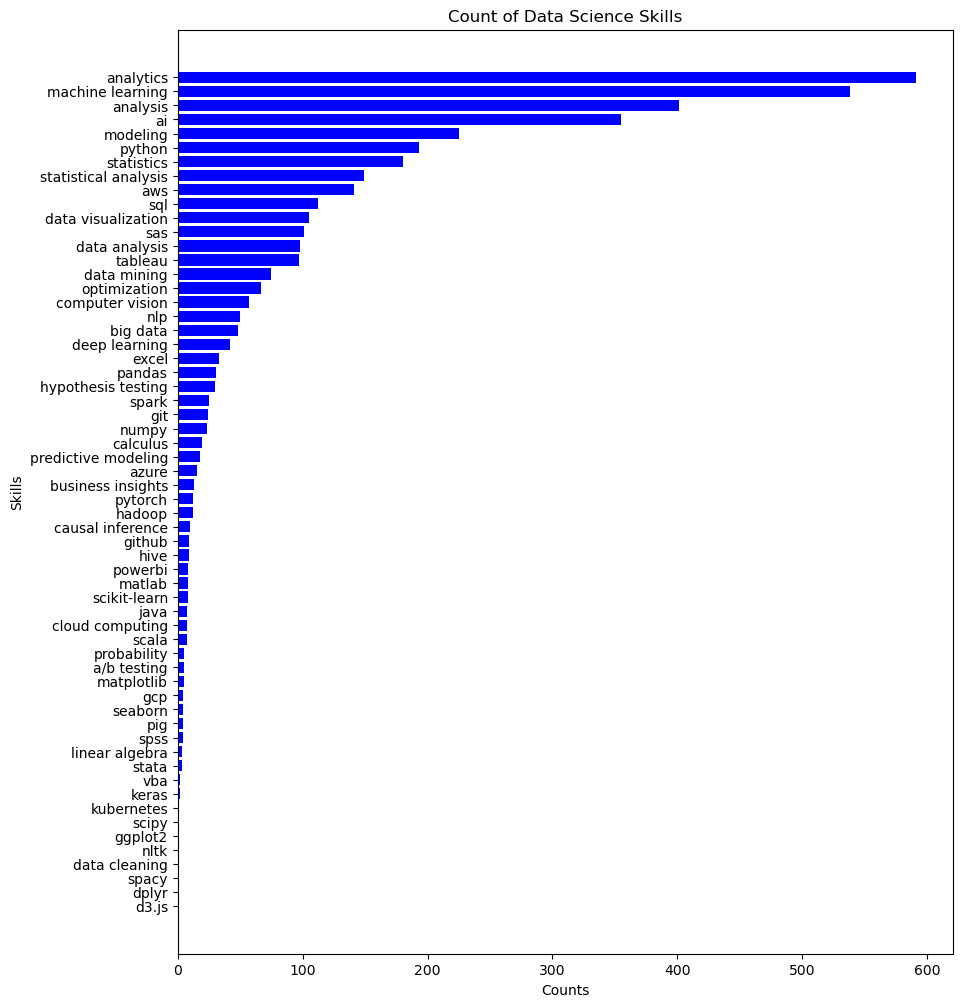

In [8]:
# Create bar plot.
plt.figure(figsize=(10,12))
plt.barh(skills_counts.index, skills_counts.values, color='blue')
plt.xlabel('Counts')
plt.ylabel('Skills')
plt.title('Count of Data Science Skills')
plt.gca().invert_yaxis()
plt.show()

<b><h3>Most In-Demand Skills</b></h3>
<b>Top 15 Skills:</b> analytics, machine learning, analysis, ai, modeling, python, statistics, statistical analysis, aws, sql, data visualization, sas, data analysis, tableau, data mining.<br>

In [9]:
# Determine how many rows do not have skills/technologies listed in the job description from the 'Skills List' column that was just created.
null_counts = df['Skills List'].isna().sum()
print(null_counts)

589


In [10]:
# Count how many unique job titles are in the df.
job_titles = df['Job Title'].value_counts()
print(job_titles)

Job Title
Data Scientist                          431
-1                                      123
Senior Data Scientist                   111
Sr. Data Scientist                       50
DATA SCIENTIST                           45
                                       ... 
Staff Data Scientist - Search             1
Staff Data Scientist - Deep Learning      1
Data Engineer - AI/ML                     1
Principal Data Scientist, Applied AI      1
Data Scientist - Hybrid Opportunity       1
Name: count, Length: 374, dtype: int64


In [11]:
# Count how many positions have 'Data Scientist' or 'Data Analyst' in the job title.
# Initialize the counts for 'Data Scientist' and 'Data Analyst'.
data_scientist_count = 0
data_analyst_count = 0

# Iterate through each job title and update counts.
for title in df['Job Title']:
    if 'data scientist' in title.lower():
        data_scientist_count += 1
    elif 'data analyst' in title.lower():
        data_analyst_count += 1

print(data_scientist_count, data_analyst_count)

1194 28


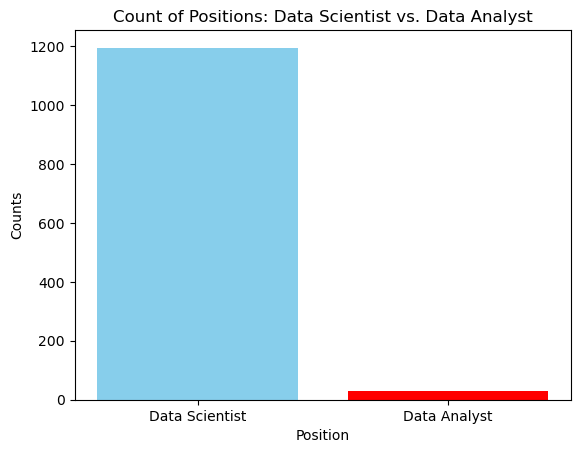

In [12]:
# Prepare data for plotting.
positions = ['Data Scientist', 'Data Analyst']
counts = [1194, 28]

# Create a bar plot.
plt.bar(positions, counts, color=['skyblue', 'red'])
plt.title('Count of Positions: Data Scientist vs. Data Analyst')
plt.xlabel('Position')
plt.ylabel('Counts')
plt.xticks(positions)
plt.show()

In [13]:
# Count how many unique industries are in the df.
industry = df['Industry'].unique()
print(industry)

['Primary & Secondary Schools' 'Computer Hardware Development'
 'Information Technology Support Services' 'Chemical Manufacturing' '-1'
 'Telecommunications Services' 'Health Care Services & Hospitals'
 'Civic & Social Services' 'Aerospace & Defense' 'Research & Development'
 'Advertising & Public Relations' 'Internet & Web Services'
 'Pet & Pet Supplies Stores' 'Consumer Product Manufacturing' 'Publishing'
 'Enterprise Software & Network Solutions' 'Accounting & Tax' 'Legal'
 'Financial Transaction Processing' 'Biotechnology'
 'Department, Clothing & Shoe Stores' 'Colleges & Universities'
 'Staffing & Subcontracting' 'Preschools & Child Care Services'
 'National Agencies' 'Consumer Electronics & Appliances Stores'
 'Banking & Lending' 'Restaurants & Cafes' 'Investment & Asset Management'
 'Business Consulting' 'Biotech & Pharmaceuticals' 'Insurance Carriers'
 'Stock Exchanges' 'Grantmaking & Charitable Foundations'
 'Broadcast Media' 'Transportation Equipment Manufacturing'
 'Software

In [14]:
# Count the occurrences of each Industry.
industry_counts = df['Industry'].value_counts()
print(industry_counts)

Industry
-1                                         309
Information Technology Support Services    186
Health Care Services & Hospitals           110
Computer Hardware Development               86
Enterprise Software & Network Solutions     77
                                          ... 
Convenience Stores                           1
Rail Transportation                          1
Food & Beverage Stores                       1
Beauty & Personal Accessories Stores         1
Photography                                  1
Name: count, Length: 72, dtype: int64


In [15]:
# Find the counts of each industry that is not = '-1'.
industry = df.loc[df['Industry'] != '-1', 'Industry']
industry_counts = industry.value_counts()
print(industry_counts)

Industry
Information Technology Support Services    186
Health Care Services & Hospitals           110
Computer Hardware Development               86
Enterprise Software & Network Solutions     77
Aerospace & Defense                         74
                                          ... 
Convenience Stores                           1
Rail Transportation                          1
Food & Beverage Stores                       1
Beauty & Personal Accessories Stores         1
Photography                                  1
Name: count, Length: 71, dtype: int64


In [16]:
# Determine if there are any null values.
industry_null_counts = df['Industry'].isna().sum()
print(industry_null_counts)

0


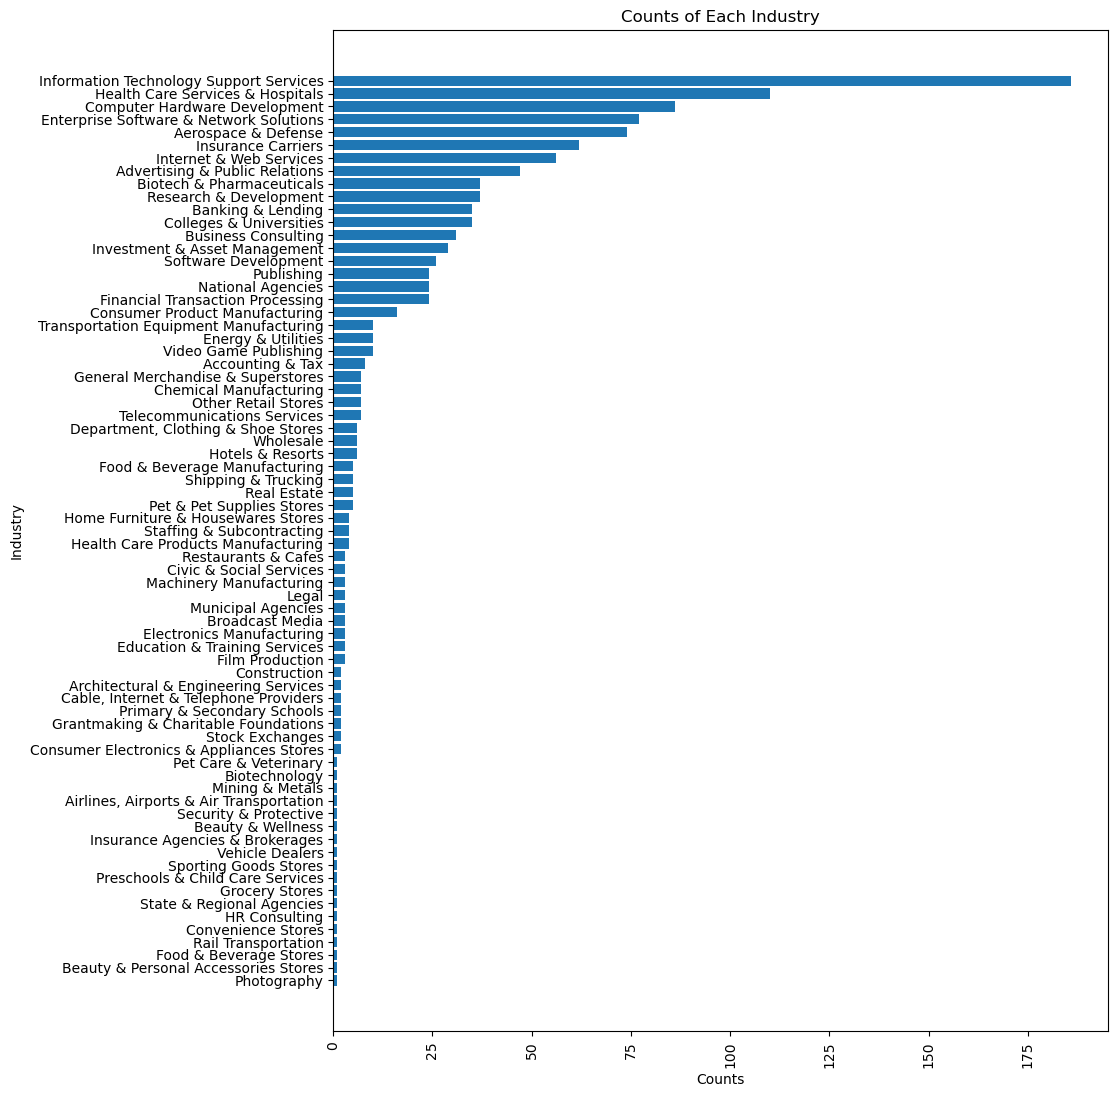

In [17]:
# Plot the counts of each industry to help identify which industry is more likely to be hiring.

plt.figure(figsize=(10, 13))
plt.barh(industry_counts.index, industry_counts.values)
plt.xlabel('Counts')
plt.ylabel('Industry')
plt.xticks(rotation=90)
plt.title('Counts of Each Industry')
plt.gca().invert_yaxis()
plt.show()

62 Skills/technologies identified in the job descriptions. 307 jobs with job titles containing Data Scientist(297) or Data Analyst(10). IT support services has the most job openings.

In [18]:
# Determine which industries have positions available with 'Data Scientist' or 'Data Analyst' in the job title.
# First filter out any Industry = '-1'.
df_filtered = df[df['Industry'] != '-1']
jobs_filtered = df_filtered[df_filtered['Job Title'].str.contains('Data Scientist|Data Analyst', case=False, na=False)]

# Group by 'Industry' and count job openings in each industry, and sort by descending order.
industry_job_counts = jobs_filtered.groupby('Industry').size().sort_values(ascending=False)
print(industry_job_counts)

Industry
Information Technology Support Services    164
Health Care Services & Hospitals           105
Enterprise Software & Network Solutions     74
Aerospace & Defense                         71
Insurance Carriers                          60
                                          ... 
Convenience Stores                           1
HR Consulting                                1
Rail Transportation                          1
Pet Care & Veterinary                        1
Grocery Stores                               1
Length: 70, dtype: int64


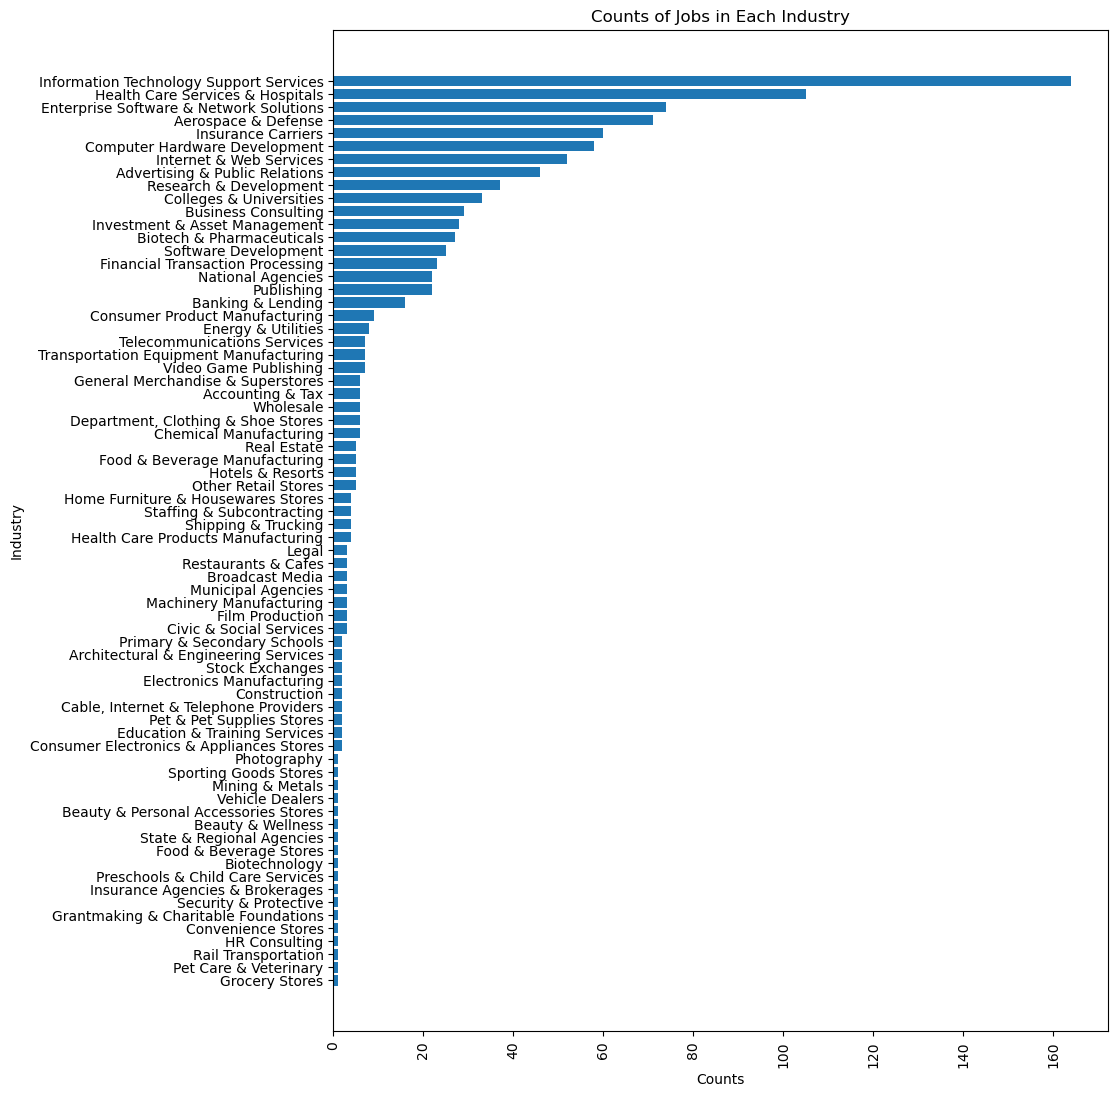

In [19]:
# Plot the Data Scientist and Data Analyst jobs in each industry
plt.figure(figsize=(10, 13))
plt.barh(industry_job_counts.index, industry_job_counts.values)
plt.xlabel('Counts')
plt.ylabel('Industry')
plt.xticks(rotation=90)
plt.title('Counts of Jobs in Each Industry')
plt.gca().invert_yaxis()
plt.show()

<b><h3>Top Industries Hiring:</b></h3>
<b>Key Industries:</b> Information Technology, Finance, Healthcare, Enterprise Software & Network Solutions, Aerospace & Defense.

In [20]:
# Determine how many and where these jobs are located (including remote).
job_locations = jobs_filtered.loc[jobs_filtered['Location'] != '-1', 'Location']
job_location_counts = job_locations.value_counts()


print(job_location_counts)

Location
Remote               193
Herndon, VA           41
Boston, MA            33
San Francisco, CA     29
New York, NY          23
                    ... 
Jersey City, NJ        1
American Fork, UT      1
Worcester, MA          1
Woburn, MA             1
Robbinsville, NJ       1
Name: count, Length: 233, dtype: int64


In [21]:
# Create a new state column and aggregate the total number of jobs in each state.
# Be sure to add capture remote opportunities in the 'State' column also.
jobs_filtered = jobs_filtered.copy()
jobs_filtered[['City', 'State']] = jobs_filtered['Location'].str.split(', ', expand=True)
jobs_filtered = jobs_filtered[jobs_filtered['Location'] != '-1']
jobs_filtered.loc[jobs_filtered['Location'].str.contains('Remote', case=False, na=False), 'State'] = 'Remote'
job_counts_by_state = jobs_filtered.groupby('State').size().sort_values(ascending=False)
print(job_counts_by_state)

State
Remote    193
CA        146
VA         78
TX         66
MA         58
OH         45
CO         38
NJ         35
PA         34
NC         34
MI         28
NY         27
MD         26
IL         26
IA         19
CT         17
FL         16
WA         16
DC         12
GA         11
WI         10
UT          7
MO          7
MN          6
AL          4
AZ          4
AR          3
LA          3
DE          2
NM          2
IN          2
OR          2
NE          2
KY          2
TN          1
ND          1
RI          1
NV          1
MS          1
NH          1
ME          1
dtype: int64


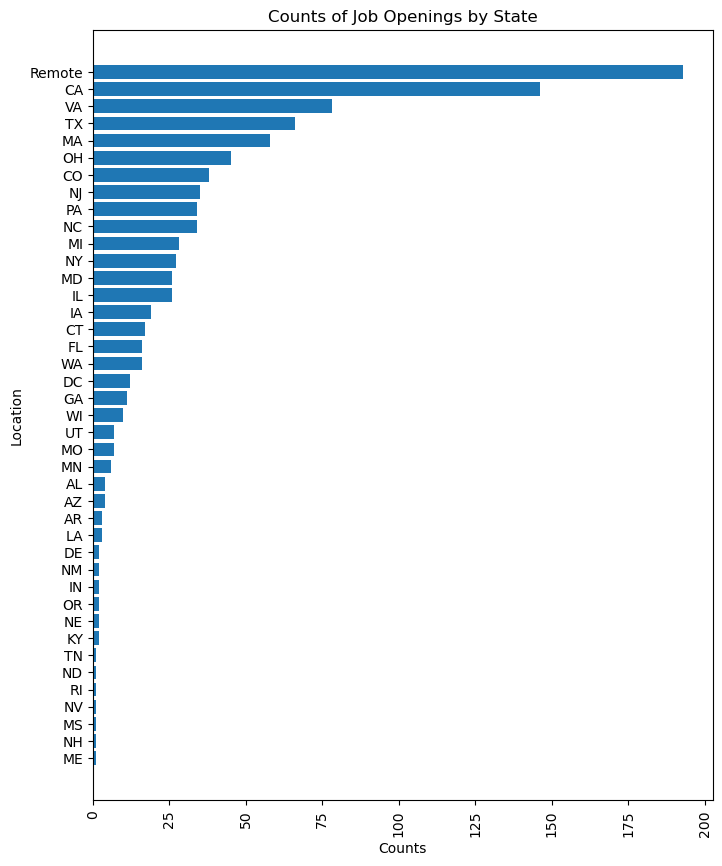

In [22]:
plt.figure(figsize=(8, 10))
plt.barh(job_counts_by_state.index, job_counts_by_state.values)
plt.xlabel('Counts')
plt.ylabel('Location')
plt.xticks(rotation=90)
plt.title('Counts of Job Openings by State')
plt.gca().invert_yaxis()
plt.show()

<h3><B>Top 10 states with job openings</B></h3>
Remote    193<br>
CA        146<br>
VA         78<br>
TX         66<br>
MA         58<br>
OH         45<br>
CO         38<br>
NJ         35<br>
PA         34<br>
NC         34<br>

In [23]:
# Function to clean and parse the salary column data
def parse_salary(salary):
    if 'K' in salary:
        salary = salary.replace('K', '').replace('$', '').replace('Employer Provided Salary:', '').replace('(Glassdoor est.)', '').strip()
        if '-' in salary:
            salary_range = salary.split('-')
            return (int(salary_range[0]), int(salary_range[1]))
    return None

In [24]:
# Apply the parsing function to the Salary Estimate column
jobs_filtered['parsed_salary'] = jobs_filtered['Salary Estimate'].apply(parse_salary)

In [25]:
#Calculate the average salary estimate
jobs_filtered['Avg Salary Estimate'] = jobs_filtered['parsed_salary'].apply(lambda x: (x[0] + x[1]) / 2 if x is not None else None)

# Drop parsed_salary column
jobs_filtered.drop(columns=['parsed_salary'], inplace=True)

# # Convert Avg Salary Estimate to integer, handling NaNs by filling them with a placeholder value
jobs_filtered['Avg Salary Estimate'] = jobs_filtered['Avg Salary Estimate'].fillna(0).astype('int')


In [26]:
#Display Cleaned salary estimates
jobs_filtered[['Salary Estimate', 'Avg Salary Estimate']].head()

,Salary Estimate,Avg Salary Estimate
0,-1,0
1,Employer Provided Salary:$83K - $153K,118
2,Employer Provided Salary:$71K - $133K,102
3,Employer Provided Salary:$94K - $183K,138
4,$48K - $78K (Glassdoor est.),63


In [27]:
# Helper function to convert revenue to integer
def convert_to_integer(value):
    if 'M' in value:
        return int(float(value.replace('M', '').replace('+', '').replace('Less than ', '0.')) * 1e6)
    elif 'B' in value:
        return int(float(value.replace('B', '').replace('+', '').replace('Less than ', '0.')) * 1e9)
    return int(value.replace('+', '').replace('Less than ', '0.'))

# Function to parse and clean the revenue data with handling for mixed units and special cases
def parse_revenue(revenue):
    if 'Unknown' in revenue or 'Non-Applicable' in revenue:
        return None
    revenue = revenue.replace('(USD)', '').replace('$', '').replace(' million', 'M').replace(' billion', 'B').strip()
    if ' to ' in revenue:
        revenue_range = revenue.split(' to ')
        if 'M' in revenue_range[0] and 'B' in revenue_range[1]:
            min_revenue = float(revenue_range[0].replace('M', '').replace('+', '').replace('Less than ', '0.')) * 1e6
            max_revenue = float(revenue_range[1].replace('B', '').replace('+', '').replace('Less than ', '0.')) * 1e9
        elif 'B' in revenue_range[0] and 'M' in revenue_range[1]:
            min_revenue = float(revenue_range[0].replace('B', '').replace('+', '').replace('Less than ', '0.')) * 1e9
            max_revenue = float(revenue_range[1].replace('M', '').replace('+', '').replace('Less than ', '0.')) * 1e6
        else:
            min_revenue = convert_to_integer(revenue_range[0])
            max_revenue = convert_to_integer(revenue_range[1])
        return (min_revenue, max_revenue)
    elif 'M' in revenue or 'B' in revenue:
        revenue = convert_to_integer(revenue)
        return (revenue, revenue)
    return None

In [28]:
# Apply the parsing function to the Revenue column
jobs_filtered['parsed_revenue'] = jobs_filtered['Revenue'].apply(parse_revenue)

# Extract min and max revenue
jobs_filtered['Min Revenue'] = jobs_filtered['parsed_revenue'].apply(lambda x: x[0] if x is not None else None)
jobs_filtered['Max Revenue'] = jobs_filtered['parsed_revenue'].apply(lambda x: x[1] if x is not None else None)

# Drop the parsed_revenue column
jobs_filtered.drop(columns=['parsed_revenue'], inplace=True)

# Display the cleaned revenue ranges
jobs_filtered[['Revenue', 'Min Revenue', 'Max Revenue']].head()

,Revenue,Min Revenue,Max Revenue
0,$500 million to $1 billion (USD),5.000000e+08,1.000000e+09
1,$5 to $10 billion (USD),5.000000e+00,1.000000e+10
2,$10+ billion (USD),1.000000e+10,1.000000e+10
3,$10+ billion (USD),1.000000e+10,1.000000e+10
4,$10+ billion (USD),1.000000e+10,1.000000e+10


In [29]:
# Display summary statistics for numerical features
summary_stats_numerical = jobs_filtered.describe()

# Display summary statistics for categorical features
summary_stats_categorical = jobs_filtered.describe(include=['O'])

# Check for missing values
missing_values = jobs_filtered.isnull().sum()

summary_stats_numerical, summary_stats_categorical, missing_values

(            Rating      Founded  Avg Salary Estimate   Min Revenue  \
 count  1052.000000  1052.000000          1052.000000  6.870000e+02   
 mean      3.795057  1672.961027            90.730989  2.528388e+09   
 std       0.874849   706.247081            64.864720  4.306359e+09   
 min      -1.000000    -1.000000             0.000000  1.000000e+00   
 25%       3.600000  1898.000000             0.000000  5.000000e+00   
 50%       3.900000  1982.000000           105.000000  2.500000e+01   
 75%       4.200000  2007.000000           129.000000  5.000000e+08   
 max       5.000000  2022.000000           334.000000  1.000000e+10   
 
         Max Revenue  
 count  6.870000e+02  
 mean   4.350084e+09  
 std    4.310282e+09  
 min    1.000000e+05  
 25%    1.000000e+08  
 50%    5.000000e+09  
 75%    1.000000e+10  
 max    1.000000e+10  ,
              Job Title Salary Estimate  \
 count             1052            1052   
 unique             283             475   
 top     Data Scientis

<b><h3>Inferential Statistics</b></h3>
<B>Hypotheses:</B><br>
<b>H0 (Null Hypothesis):</b> There is no significant difference in the demand for specific skills between Data Scientist and Data Analyst job descriptions.<br>
<b>H1 (Alternative Hypothesis):</b> There is a significant difference in the demand for specific skills between Data Scientist and Data Analyst job descriptions.

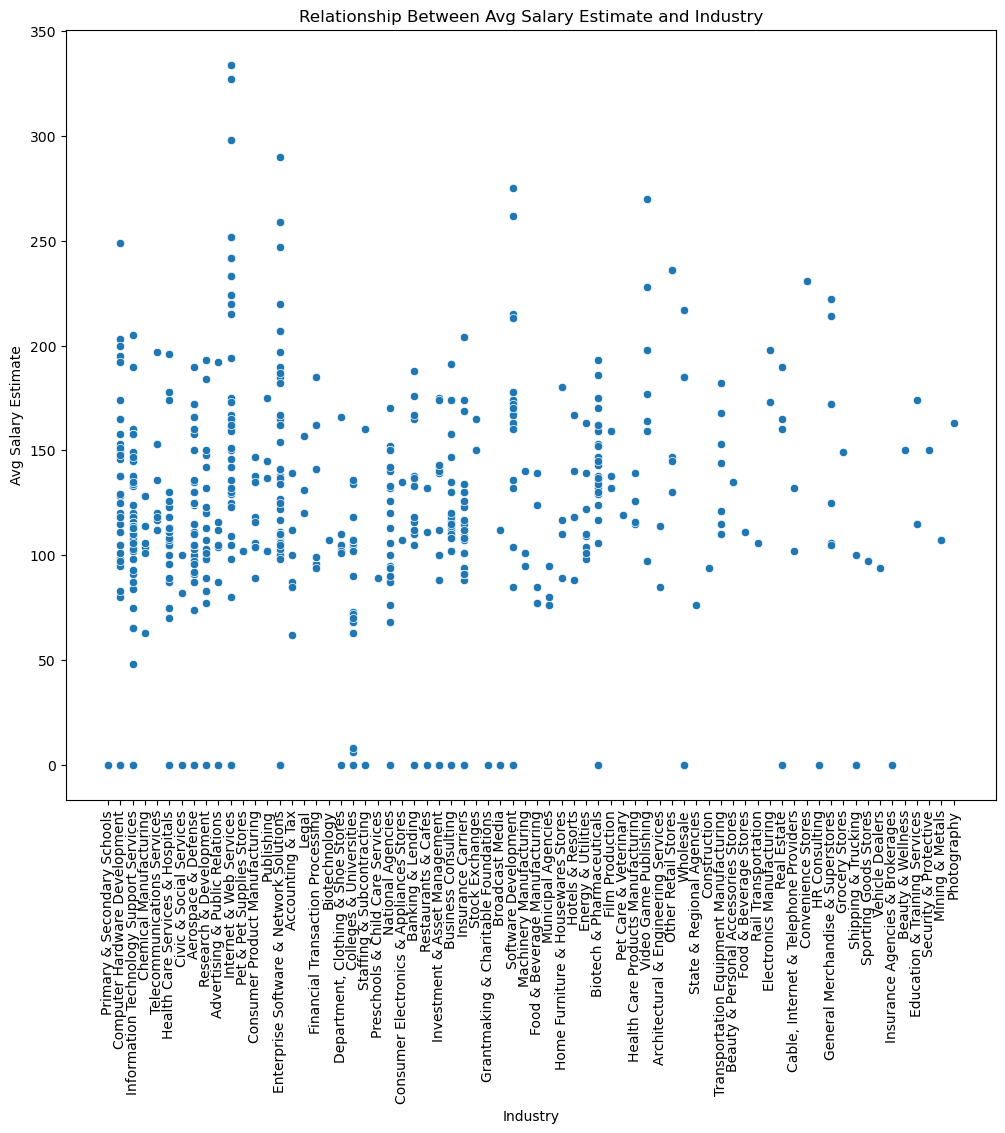

In [30]:
# Scatter plot of average salary estimate vs. industry
plt.figure(figsize=(12, 10))
sns.scatterplot(data=jobs_filtered, x='Industry', y='Avg Salary Estimate')
plt.title('Relationship Between Avg Salary Estimate and Industry')
plt.xlabel('Industry')
plt.ylabel('Avg Salary Estimate')
plt.xticks(rotation=90)
plt.show()

Companies from the internet and software industires tend to pay higher wages. That being said, most of the industires are paying ~$100K or more for Data Scientist and Data Analyst jobs.

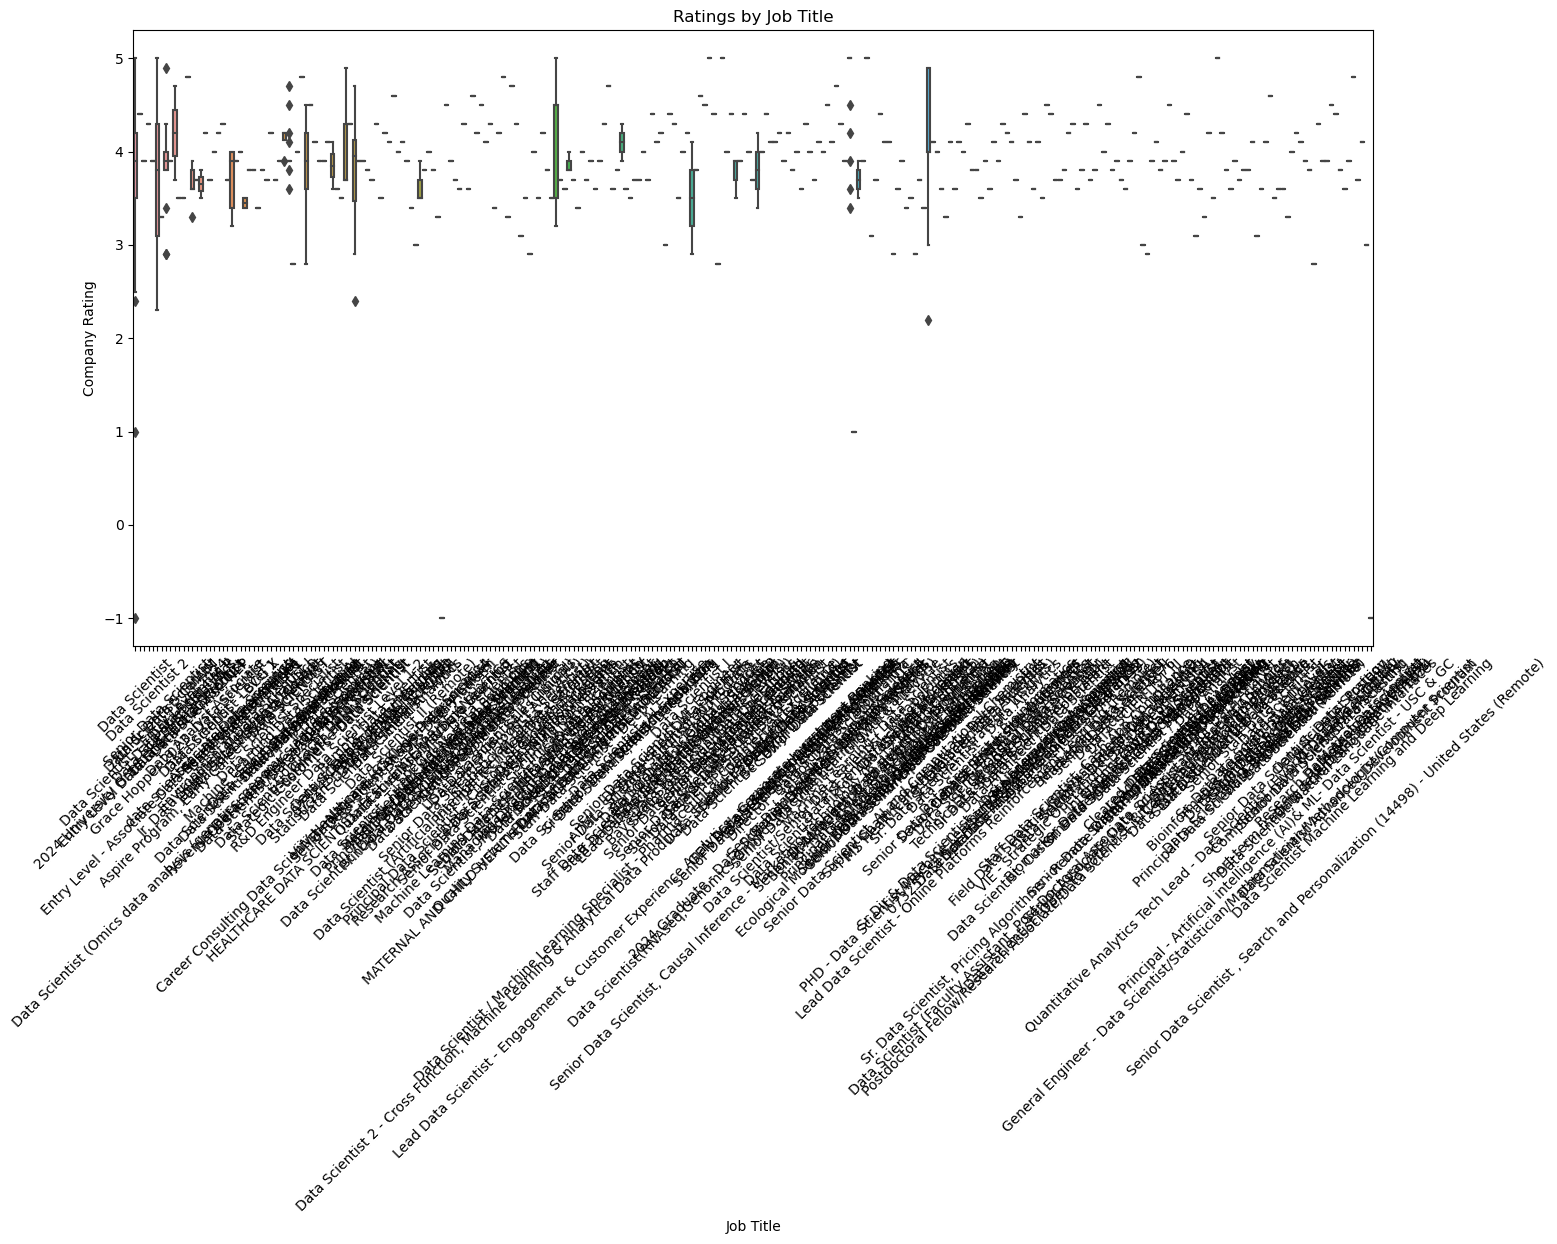

In [31]:
# Filter data for box plot visualization
jobs_filtered = jobs_filtered[jobs_filtered['Job Title'].str.contains('Data Scientist|Data Analyst', case=False, na=False)]

# Box plot of Rating by job title
plt.figure(figsize=(16, 8))
sns.boxplot(x='Job Title', y='Rating', data=jobs_filtered)
plt.title('Ratings by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Company Rating')
plt.xticks(rotation=45)
plt.show()

The box plot shows the distribution of company ratings across all Data Scientist and Data Analyst jobs. Both roles have a similar distribution of ratings with the mean rating around 3.8. This indicates that companies hiring for these rols generally have good ratings.

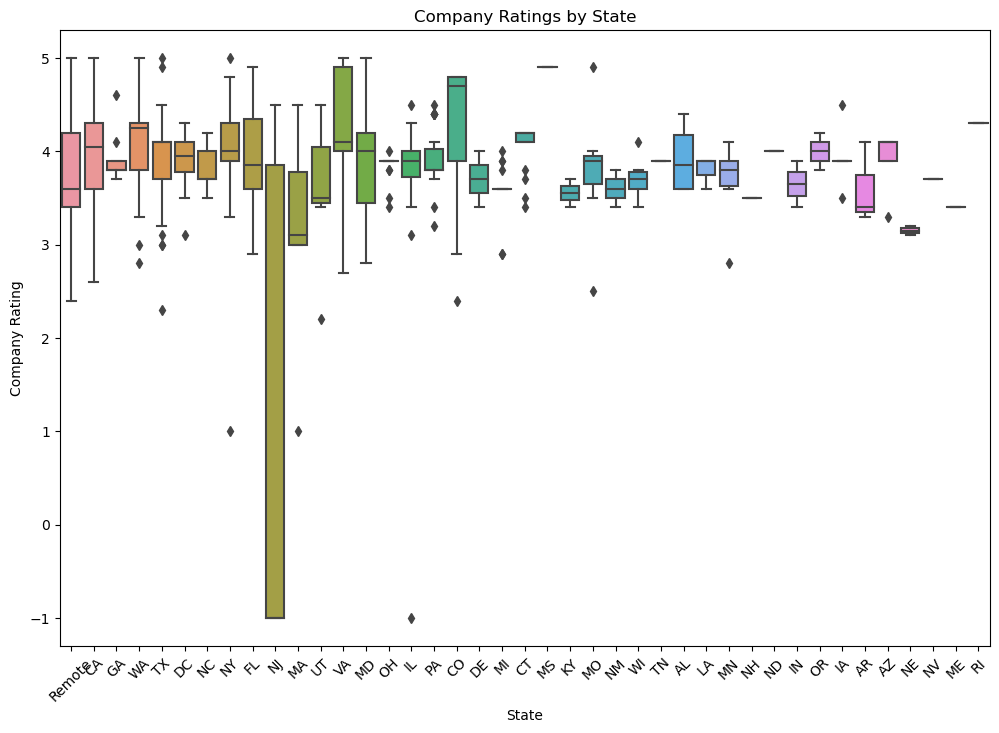

In [32]:
# Box plot of ratings by state
plt.figure(figsize=(12,8))
sns.boxplot(x='State', y='Rating', data=jobs_filtered)
plt.title('Company Ratings by State')
plt.xlabel('State')
plt.ylabel('Company Rating')
plt.xticks(rotation=45)
plt.show()

The box plot shows the distribution of company ratings across all states with Data Scientist and Data Analyst roles available. Most states have median ratings of 3.5 to 4.1, indicating generally positive company ratings across the US.

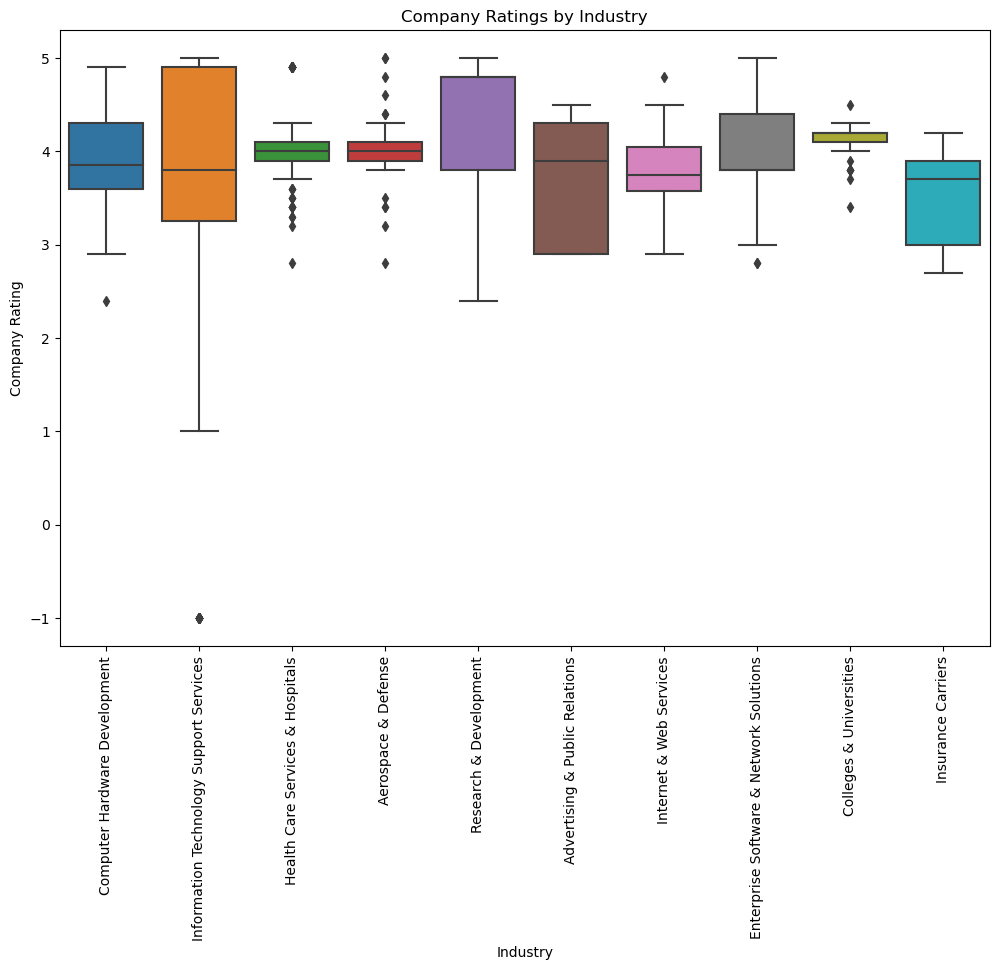

In [33]:
# Filter for top 10 industries
industry_counts = jobs_filtered['Industry'].value_counts().reset_index()
top_industries = industry_counts.head(10)
top_industries_list = top_industries['Industry'].tolist()
df_top_industries = jobs_filtered[jobs_filtered['Industry'].isin(top_industries_list)]

# Box plot of ratings by top industries
plt.figure(figsize=(12, 8))
sns.boxplot(x='Industry', y='Rating', data=df_top_industries)
plt.title('Company Ratings by Industry')
plt.xlabel('Industry')
plt.ylabel('Company Rating')
plt.xticks(rotation=90)
plt.show()

The box plot shows the distribution of company ratings across the top 10 industries. Most industries have median ratings around 3.5 to 4.0, with some variability in the distribution. This indicates that while most industries maintain good company ratings, there are some differences in the spread of these ratings.

In [34]:
# Select numerical and categorical features
numerical_features = ['Rating', 'Avg Salary Estimate']
categorical_features = ['Job Title', 'Location', 'Company Name', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue']

In [35]:
# Define transformations for numerical and categorical features
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                            ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine the transformers
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),
                            ('cat', categorical_transformer, categorical_features)])

# Apply the transformations to the dataset
df_transformed = preprocessor.fit_transform(jobs_filtered)

# Convert the transformed data back to a DataFrame for easier analysis
df_transformed = pd.DataFrame(df_transformed.toarray())

df_transformed.shape

(1052, 1181)

<b>Transformation Results:</b> The dataset has been transformed and now consists of 1181 features, which include both the scaled numerical features and the one-hot encoded categorical features.

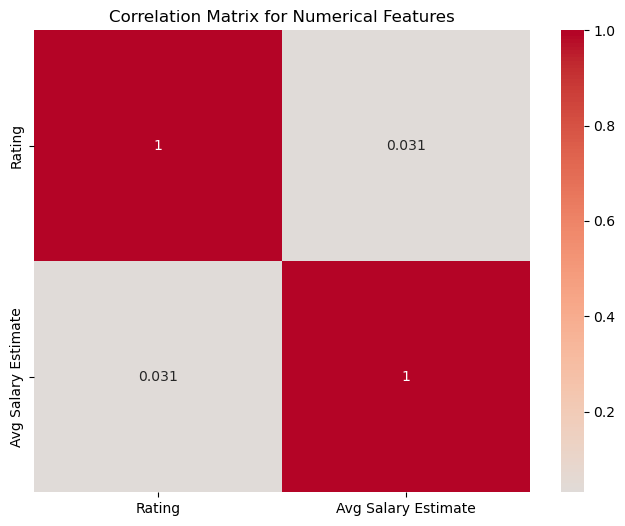

In [36]:
# Compute the correlation matrix for the numerical features
correlation_matrix = jobs_filtered[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

<b>Most In-Demand Skills:</b><br>
<b>Top Skills:</b> Analytics, Machine learning, Analysis, AI, Modeling, Python, Statistics, Statistical analysis, AWS, SQL, Data visualization, SAS, Data analysis, Tableau, Data mining.<br>
These skills are critical for candidates looking to secure a Data Scientist or Data Analyst position.<br><br>
<b>Top Locations for Jobs:</b><br>
<b>Top Locations:</b> Major states with tech hubs have the most job opportunities.<br>
Visualization shows the distribution of these jobs across each state.<br><br>
<b>Top Industries Hiring:</b><br>
<b>Key Industries:</b> Information Technology, Finance, Healthcare, Enterprise Software & Network Solutions, and Aerospace & Defense.
Visualization shows the distribution of these jobs across various industries.<br><br>
<b>Data Relationships:</b><br>
<b>Scatter Plot:</b> Weak positive correlation between average salary estimates and industry.<br>
<b>Box Plots:</b> Similar distributions of company ratings across job titles, locations, and industries.<br><br>
<b>Feature Engineering:</b><br>
Categorical features have been one-hot encoded.<br>
Numerical features have been standardized.<br>
Missing values in numerical features have been imputed using median values.<br><br>
<b>Recommendations</b><br>
<b>1. Skill Development:</b> Prioritize learning Machine learning, Analytics, Python, Statistics, SQL, and Data visualization. These are the some of the most frequently mentioned skills in job descriptions.<br>
<b>2. Targeted Job Search:</b> Focus on the top locations and industries identified. This will increase the efficiency of your job search<br>
<b>3. Continuous Analysis:</b> Regularly update the analysis to capture trends and changes in the job market.